### Imports

In [1]:
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns


In [2]:
housing = pd.read_excel("machineLearning_excel_updated.xlsx")
x = housing.drop(['Name'], axis=1)
y= housing['Name']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (728, 4)
x_test : (183, 4)
y_train : (728,)
y_test : (183,)


In [3]:
from sklearn.linear_model import LinearRegression, Lasso

In [4]:
lr = LinearRegression()
lr.fit(x_train,y_train)
#
y_predict = lr.predict(x_test)
y_predict

array([5.38856849, 5.54793175, 3.80518345, 4.61411854, 3.79675486,
       4.52505689, 6.32236249, 6.17748225, 4.15760988, 6.20144282,
       2.52435512, 4.52563925, 5.09568207, 6.29600685, 6.23596227,
       6.37647017, 5.50327278, 4.30265485, 5.68078899, 6.08410564,
       6.50352853, 6.35675245, 4.95902779, 4.22079989, 6.16428817,
       4.93277933, 6.53737073, 4.72127166, 5.58726025, 3.62012585,
       4.62573116, 6.46648045, 4.77118226, 5.87324559, 5.01110568,
       6.09797862, 4.68592969, 5.31404699, 5.11823494, 6.15785522,
       3.41485862, 2.46513178, 5.41467677, 5.94321789, 4.71210406,
       6.38199086, 4.89522377, 4.73407448, 3.44642923, 6.36166941,
       5.87390702, 5.87390702, 5.73097468, 4.91279704, 4.80798553,
       4.0496008 , 4.82532294, 6.17809687, 5.32273153, 5.09868419,
       6.57104954, 5.7077216 , 6.4035199 , 5.93431299, 6.17434895,
       4.54405421, 5.09501894, 3.16207697, 5.8662639 , 6.13787487,
       5.22740265, 3.89630297, 6.20102716, 5.48258401, 3.25022

In [5]:
print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

mean absolute error:  0.844070739089835
 root mean squared error:  1.0523077993785097
Coefficient of determination R^2:  0.5517779293602634


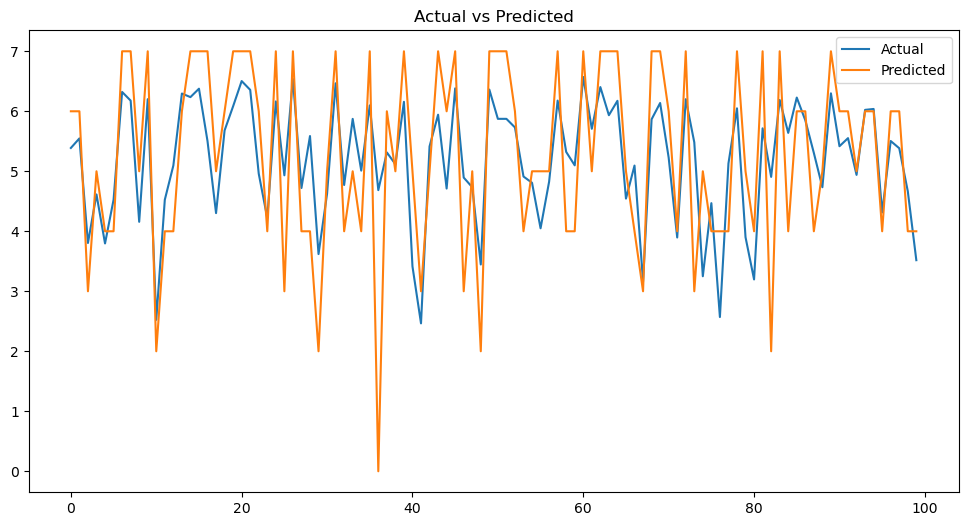

In [6]:
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error:  0.8360655737704918
Root Mean Squared Error:  1.352997077933347
Coefficient of determination R^2:  0.2590287178495456


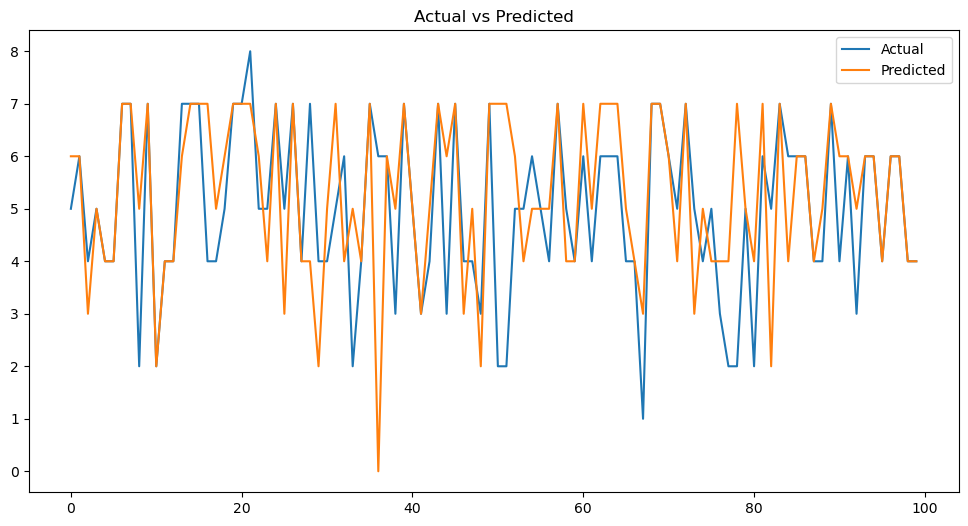

In [7]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_predict_dt = dt.predict(x_test)

# Print metrics
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predict_dt))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predict_dt)))
print('Coefficient of determination R^2: ', r2_score(y_test, y_predict_dt))

# Plot Actual vs Predicted values
fig = plt.figure(figsize=(12, 6))
result = pd.DataFrame({'Predicted': y_predict_dt, 'Actual': y_test})
result = result.reset_index()
result = result.drop(['index'], axis=1)
plt.plot(result[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  0.8437940751553806
 root mean squared error:  1.052127590612463
Coefficient of determination R^2:  0.5519314331735723


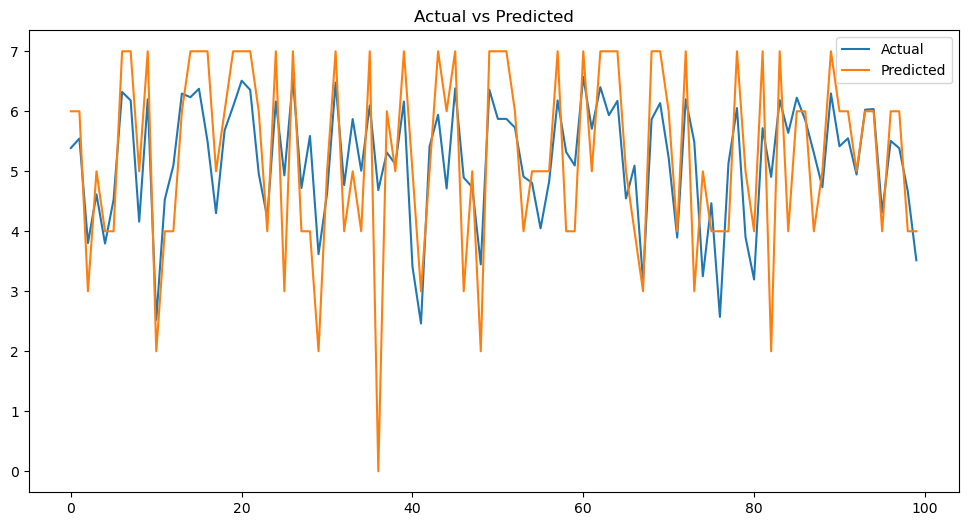

In [8]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))

# Lasso İçin Tahmin Grafiği Çizelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  0.7039344262295082
root mean squared error:  1.0051028275699314
Coefficient of determination R^2:  0.5910891365306516


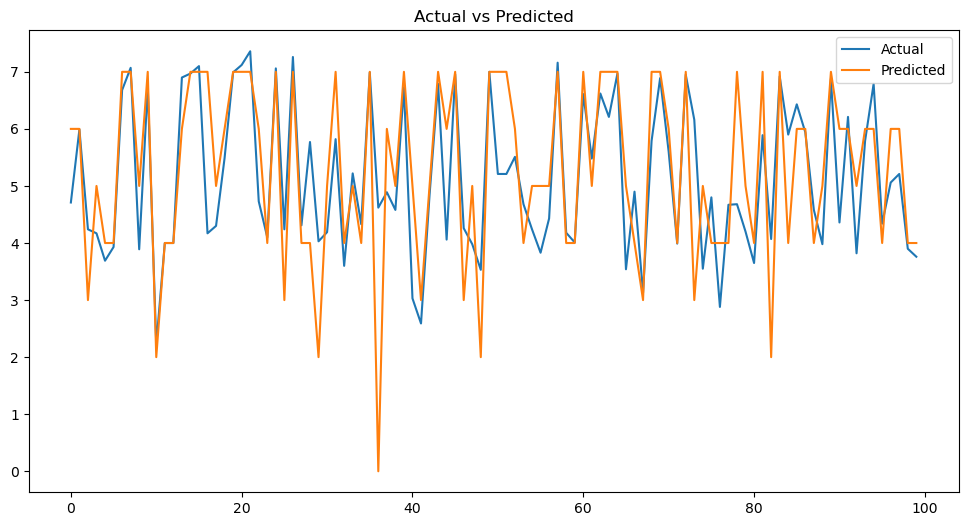

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

In [10]:
final_RMSE = pd.DataFrame( data  = [[61399.61, 61399.61, 62998.31, 45344.87],
                                    [0.604,0.604,0.583,0.784]],
                          columns  = ['Linear Regression','Lasso','Decision Tree Regressor','Random Forest Regressor'],
                         index =['RMSE','R2'])


final_RMSE = final_RMSE.T

cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE,R2
Linear Regression,61399.610000,0.604000
Lasso,61399.610000,0.604000
Decision Tree Regressor,62998.310000,0.583000
Random Forest Regressor,45344.870000,0.784000


In [11]:
params_grid = {
    'n_estimators':[10,20,50],
    'max_leaf_nodes':list(range(0,5))}


grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=3)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\s

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4],
                         'n_estimators': [10, 20, 50]},
             verbose=1)

In [12]:
grid_search.best_params_    # en uygun parametreleri yazdır 

{'max_leaf_nodes': 4, 'n_estimators': 10}

mean absolute error:  0.786861342818443
root mean squared error:  1.0504659439098487
Coefficient of determination R^2:  0.5533456033487207


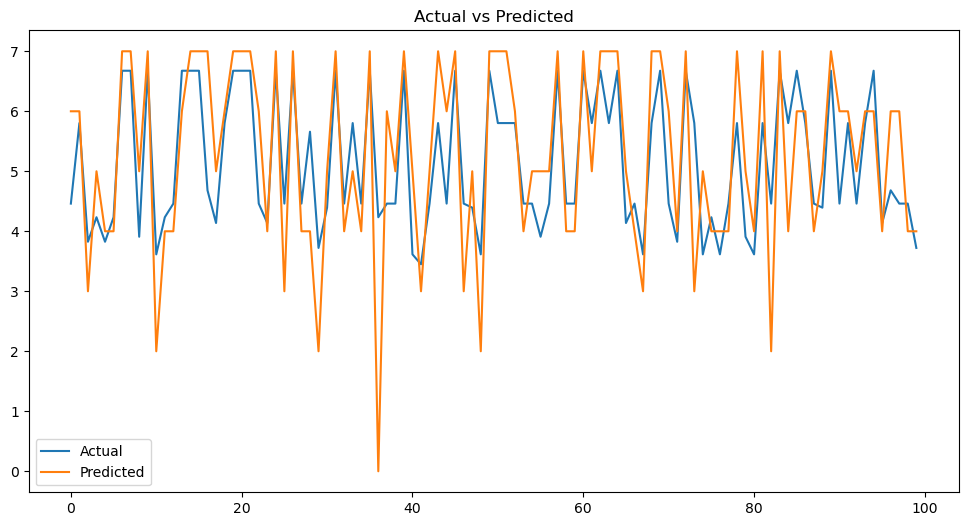

In [13]:
# bulduğumuz parametrelerle test edelim
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,max_leaf_nodes=4)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()